In [1]:
import os, shutil, PIL
original_dataset_dir = '../data/primary_small/'
train_dir = os.path.join(original_dataset_dir, 'train')
validation_dir = os.path.join(original_dataset_dir, 'valid')
test_dir = os.path.join(original_dataset_dir, 'test')

In [2]:
import os, shutil, PIL
original_dataset_dir = '../data/primary_small/'
train_dir = os.path.join(original_dataset_dir, 'train')
validation_dir = os.path.join(original_dataset_dir, 'valid')
test_dir = os.path.join(original_dataset_dir, 'test')

from keras import layers
from keras import models
from keras import optimizers


model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(7, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

model.summary()

Using TensorFlow backend.
/media/angus/Shared/Documents/Uni/final_year_project/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/media/angus/Shared/Documents/Uni/final_year_project/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/media/angus/Shared/Documents/Uni/final_year_project/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 128)       36992     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)     

In [4]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(),
             metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
         train_dir,
         target_size=(150,150),
         batch_size=32,
         class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical')

Found 5600 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [6]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=90,
validation_data=validation_generator,
validation_steps=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/90
100/100 [==============================] - 386s 4s/step - loss: 1.8083 - acc: 0.2912 - val_loss: 6.0211 - val_acc: 0.1413
Epoch 2/90
100/100 [==============================] - 384s 4s/step - loss: 1.6861 - acc: 0.3153 - val_loss: 7.1423 - val_acc: 0.1445
Epoch 3/90
100/100 [==============================] - 388s 4s/step - loss: 1.6747 - acc: 0.3359 - val_loss: 3.9945 - val_acc: 0.1394
Epoch 4/90
100/100 [==============================] - 391s 4s/step - loss: 1.6202 - acc: 0.3347 - val_loss: 4.4668 - val_acc: 0.1455
Epoch 5/90
100/100 [==============================] - 390s 4s/step - loss: 1.6092 - acc: 0.3609 - val_loss: 3.8784 - val_acc: 0.1451
Epoch 6/90
100/100 [==============================] - 392s 4s/step - loss: 1.5619 - acc: 0.3816 - val_loss: 2.1358 - val_acc: 0.2839
Epoch 7/90
100/100 [==============================] - 389s 4s/step - loss: 1.5750 - acc: 0.3841 - val_loss:

100/100 [==============================] - 392s 4s/step - loss: 1.1107 - acc: 0.5953 - val_loss: 7.9832 - val_acc: 0.3254
Epoch 58/90
100/100 [==============================] - 394s 4s/step - loss: 1.1071 - acc: 0.5987 - val_loss: 6.6794 - val_acc: 0.2971
Epoch 59/90
100/100 [==============================] - 390s 4s/step - loss: 1.1542 - acc: 0.5813 - val_loss: 3.2410 - val_acc: 0.3086
Epoch 60/90
100/100 [==============================] - 393s 4s/step - loss: 1.1214 - acc: 0.5928 - val_loss: 8.3392 - val_acc: 0.1489
Epoch 61/90
100/100 [==============================] - 391s 4s/step - loss: 1.1214 - acc: 0.5916 - val_loss: 2.0776 - val_acc: 0.4497
Epoch 62/90
100/100 [==============================] - 393s 4s/step - loss: 1.1132 - acc: 0.5934 - val_loss: 6.9823 - val_acc: 0.1784
Epoch 63/90
100/100 [==============================] - 390s 4s/step - loss: 1.1051 - acc: 0.5941 - val_loss: 9.9235 - val_acc: 0.1877
Epoch 64/90
100/100 [==============================] - 394s 4s/step - loss

In [7]:
model.save('./../models/seti_small_8.h5')

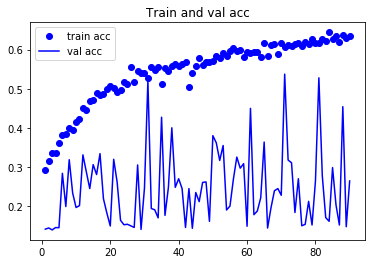

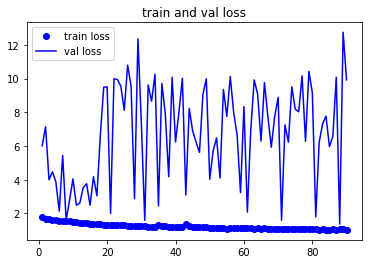

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='train acc')
plt.plot(epochs,val_acc, 'b', label='val acc')
plt.title('Train and val acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs,val_loss, 'b',label='val loss')
plt.title('train and val loss')
plt.legend()

plt.show()